# A moment of inspiration

Decompose the two regimes. Fit the function $\frac{a}{1+\exp[-b(x-c)]}$ for both regimes.
The fitted parameters are gonna be different for different grain sizes. Plot them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
jar = pd.read_csv('nominal_set.csv')

# Useful abbreviations
fd = 'Fission Density (10^21 f/cm3)'
gr = 'Grain Size (um)'
fgs = 'Fuel Gas Swelling (%)'

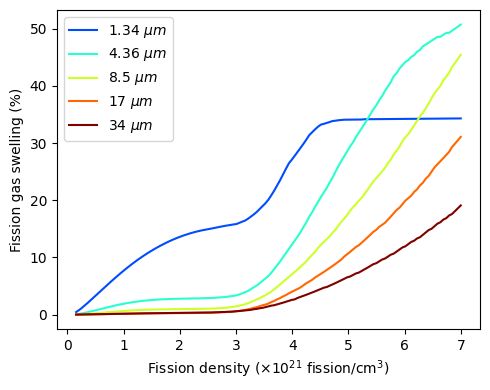

In [3]:
plt.figure(figsize=(5,4))
for G, col in zip([1.34, 4.36, 8.5, 17, 34],
                  [0.2,0.4,0.6,0.8,1.0]):
    # select grain size
    tra = jar.loc[jar[gr] == G]

    plt.plot(tra[fd], tra[fgs], c=plt.cm.jet(col), label=f'{G} $\mu m$')

plt.xlabel(r'Fission density ($\times 10^{21}$ fission/cm$^3$)')
plt.ylabel('Fission gas swelling (%)')
plt.legend()
plt.tight_layout()
plt.savefig('img_1.pdf')
plt.show()

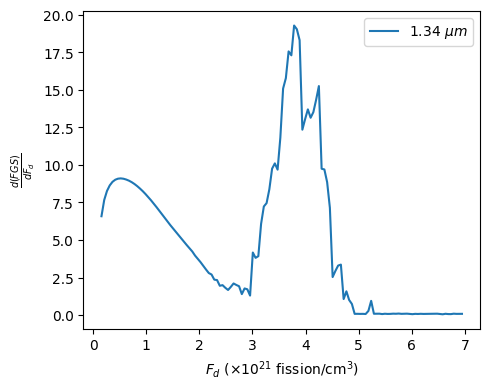

In [4]:
tra = jar.loc[jar[gr] == 1.34]
dd = [y/x for y, x in zip(np.diff(tra[fgs]), np.diff(tra[fd]))]

plt.figure(figsize=(5,4))
plt.plot(tra[fd].iloc[:-1], dd, label=r'1.34 $\mu m$')

plt.xlabel(r'$F_d$ ($\times 10^{21}$ fission/cm$^3$)')
plt.ylabel(r'$\frac{d(FGS)}{dF_d}$')
plt.legend()
plt.tight_layout()
plt.savefig('img_2.pdf')
plt.show()

In [5]:
def sig(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

[15.42878432  2.3156355   1.05156509] [18.49729352  3.99287276  3.87542059]
[2.78425708 3.68623439 0.78562885] [48.32166597  1.6306541   4.91161586]
[0.97408818 3.73485018 0.82405661] [51.3524786   1.21036621  5.67818378]
[0.27749882 3.43039858 0.88210799] [38.26224552  1.15876605  5.92771169]
[0.34932246 2.22897967 1.11773578] [23.5630077   1.13012334  5.98566361]


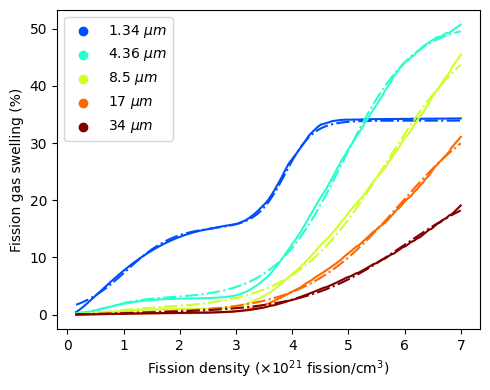

In [6]:
plt.figure(figsize=(5,4))

for G, col in zip([1.34, 4.36, 8.5, 17, 34],
                  [0.2,0.4,0.6,0.8,1.0]):
    # select grain size
    tra = jar.loc[jar[gr] == G]

    # cutoff based on local minimum
    dd = np.diff(tra[fgs])
    pivlo = len(dd) // 7 * 2
    pivhi = pivlo * 2
    mi = pivlo + np.argmin(dd[pivlo:pivhi])
    cut = tra[fgs].iloc[mi]

    low = tra.loc[tra[fgs] <= cut]
    high = tra.loc[tra[fgs] > cut]
    high.loc[:,fgs] = high.loc[:,fgs] - cut

    p1, c1 = curve_fit(sig, low[fd], low[fgs],
                       bounds=([0,0,0], [np.inf,np.inf,np.inf]))
    p2, c2 = curve_fit(sig, high[fd], high[fgs],
                       bounds=([0,0,0], [np.inf,np.inf,np.inf]))
    print(p1, p2)

    pred = [sig(x, *p1) + sig(x, *p2) for x in tra[fd]]
    plt.plot(tra[fd], tra[fgs], c=plt.cm.jet(col))
    plt.plot(tra[fd], pred, ls='-.', c=plt.cm.jet(col))
    plt.scatter([], [], color=plt.cm.jet(col), label=f'{G} $\mu m$')

plt.xlabel(r'Fission density ($\times 10^{21}$ fission/cm$^3$)')
plt.ylabel('Fission gas swelling (%)')
plt.legend()
plt.tight_layout()
plt.savefig('img_3.pdf')
plt.show()

# Grain size dependence

In [7]:
bar = pd.read_csv('eureka.csv')

In [8]:
bar

,G,A,B,C,L,M,N
0,1.34,15.428784,2.315636,1.051565,18.497294,3.992873,3.875421
1,4.36,2.784257,3.686234,0.785629,48.321666,1.630654,4.911616
2,8.50,0.974088,3.734850,0.824057,51.352479,1.210366,5.678184
3,17.00,0.277499,3.430399,0.882108,38.262245,1.158766,5.927712
4,34.00,0.349322,2.228980,1.117736,23.563008,1.130123,5.985664


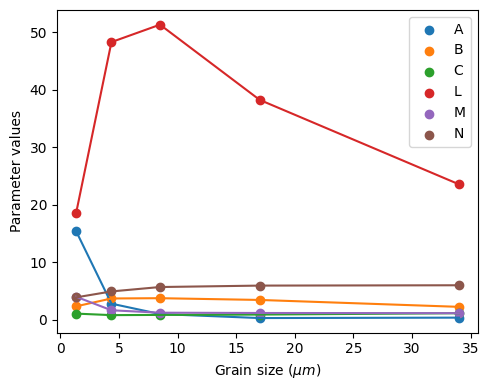

In [9]:
plt.figure(figsize=(5,4))

for name in ['A', 'B', 'C', 'L', 'M', 'N']:
    plt.plot(bar['G'], bar[name])
    plt.scatter(bar['G'], bar[name], label=f'{name}')

plt.xlabel('Grain size ($\mu m$)')
plt.ylabel('Parameter values')
plt.legend()
plt.tight_layout()
plt.savefig('img_4a.pdf')
plt.show()

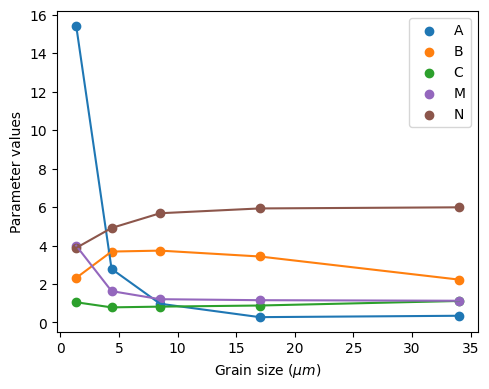

In [10]:
plt.figure(figsize=(5,4))

for name in ['A', 'B', 'C', 'L', 'M', 'N']:
    if name == 'L':
        plt.plot([], [])
        plt.scatter([], [])
    else:
        plt.plot(bar['G'], bar[name])
        plt.scatter(bar['G'], bar[name], label=f'{name}')
    
plt.xlabel('Grain size ($\mu m$)')
plt.ylabel('Parameter values')
plt.legend()
plt.tight_layout()
plt.savefig('img_4b.pdf')
plt.show()

## First parameter - A

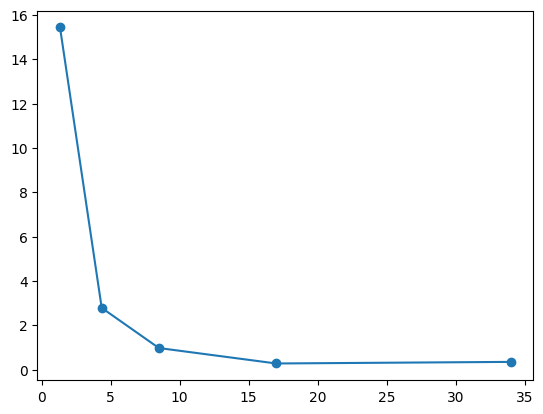

In [11]:
plt.plot(bar['G'], bar['A'])
plt.scatter(bar['G'], bar['A'])

In [12]:
def parA(x, a, b, c, d):
    return a * np.exp(-b*(x-c)) + d

In [13]:
pA, cA = curve_fit(parA, bar['G'], bar['A'],
                  bounds=(0, np.inf))
pA

array([2.53194699, 0.606492  , 4.27046969, 0.44925561])

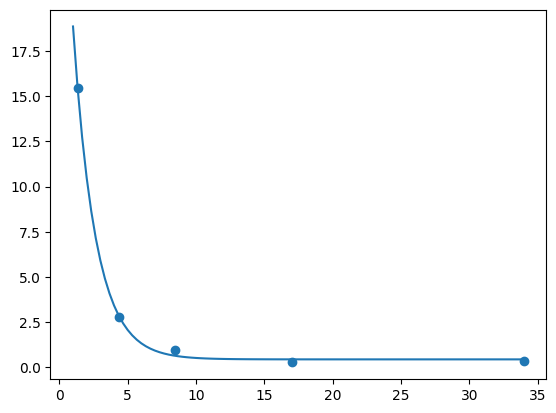

In [14]:
boyA = np.linspace(1, 34, 100)
cotA = [parA(x, *pA) for x in boyA]

plt.plot(boyA, cotA)
plt.scatter(bar['G'], bar['A'])

## Second parameter - B

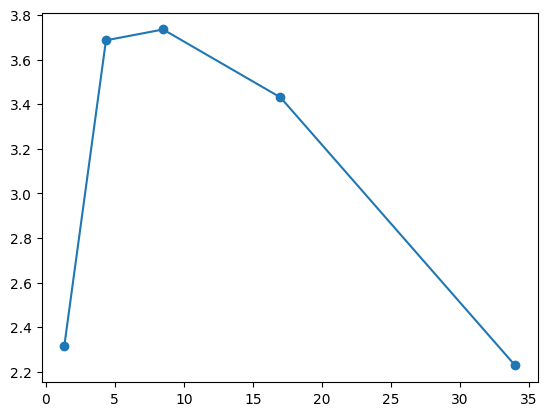

In [15]:
plt.plot(bar['G'], bar['B'])
plt.scatter(bar['G'], bar['B'])

In [16]:
def parB(x, a, b, c, k):
    return c * (x/k)**a * (1-x/k)**b

In [17]:
pB, cB = curve_fit(parB, bar['G'], bar['B'],
                  bounds=([0,1,0,0], [1,30,20,100]))
pB

array([  0.37034302,   3.31178944,  12.69951541, 100.        ])

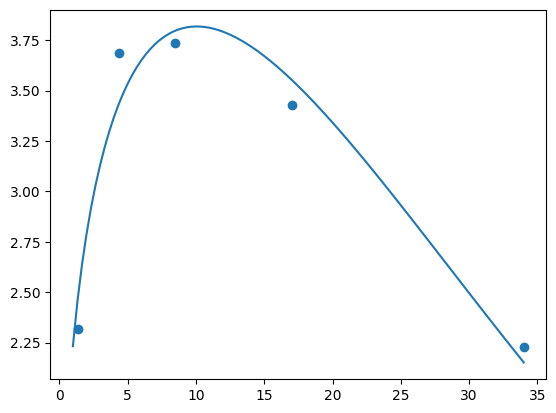

In [18]:
boyB = np.linspace(1, 34, 100)
cotB = [parB(x, *pB) for x in boyB]

plt.plot(boyB, cotB)
plt.scatter(bar['G'], bar['B'])

In [19]:
def perB(x, a, b, c, h):
    return a * np.exp(-b*x) * np.log(c*x) + h

In [20]:
pB, cB = curve_fit(perB, bar['G'], bar['B'],
                  bounds=(0, np.inf))
pB

array([1.50100144, 0.04209532, 2.44441446, 0.65036568])

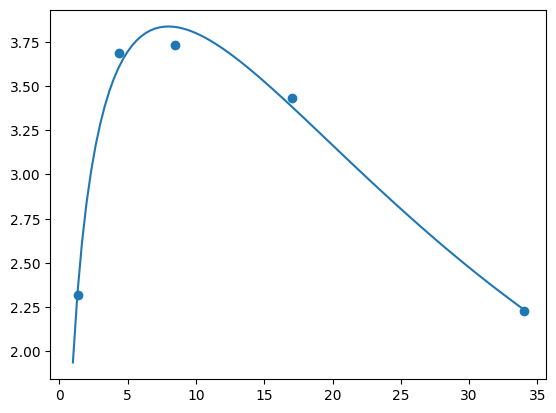

In [21]:
boyB = np.linspace(1, 34, 100)
cotB = [perB(x, *pB) for x in boyB]

plt.plot(boyB, cotB)
plt.scatter(bar['G'], bar['B'])

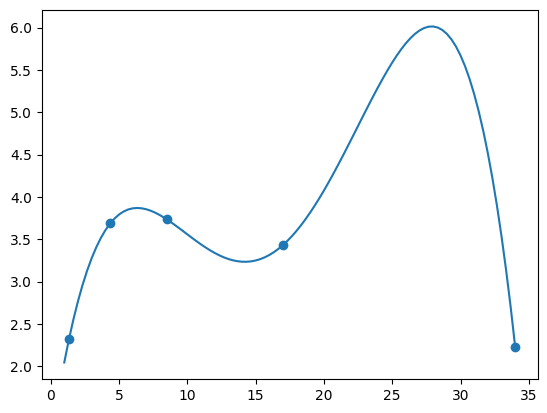

In [22]:
pBa = np.polyfit(bar['G'], bar['B'], 4)
boo = np.poly1d(pBa)

boyB = np.linspace(1, 34, 100)
cotBa = [boo(x) for x in boyB]

plt.plot(boyB, cotBa)
plt.scatter(bar['G'], bar['B'])

# Third parameter - C

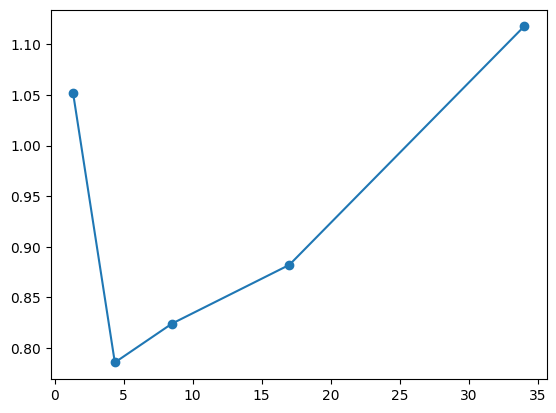

In [23]:
plt.plot(bar['G'], bar['C'])
plt.scatter(bar['G'], bar['C'])

# Fourth parameter - L

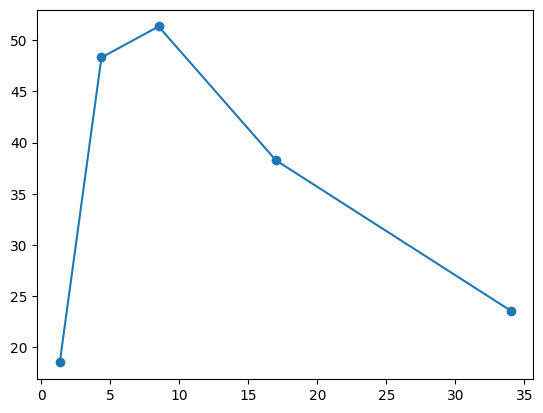

In [24]:
plt.plot(bar['G'], bar['L'])
plt.scatter(bar['G'], bar['L'])

In [25]:
def parL(x, a, b, c, k):
    return c * (x/k)**a * (1-x/k)**b

In [26]:
pL, cL = curve_fit(parL, bar['G'], bar['L'],
                  bounds=([0,0,200,50], [1,20,700,250]))
pL

array([6.46570348e-01, 1.36929571e+01, 7.00000000e+02, 2.13325820e+02])

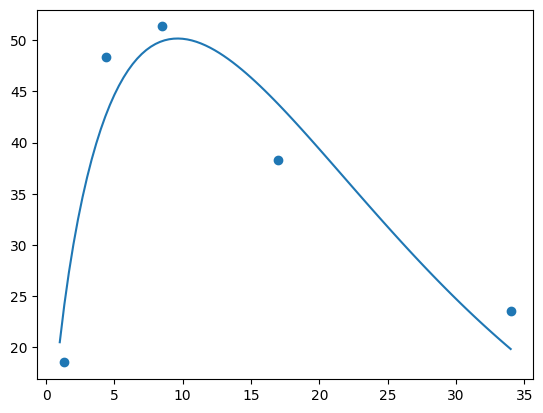

In [27]:
boyL = np.linspace(1, 34, 100)
cotL = [parL(x, *pL) for x in boyL]

plt.plot(boyL, cotL)
plt.scatter(bar['G'], bar['L'])

In [28]:
def perL(x, a, b, c, h):
    return a * np.exp(-b*x) * np.log(c*x) + h

In [29]:
pL, cL = curve_fit(perL, bar['G'], bar['L'],
                  bounds=(0, np.inf))
pL

array([38.43060045,  0.09157068,  0.75734192, 17.91784088])

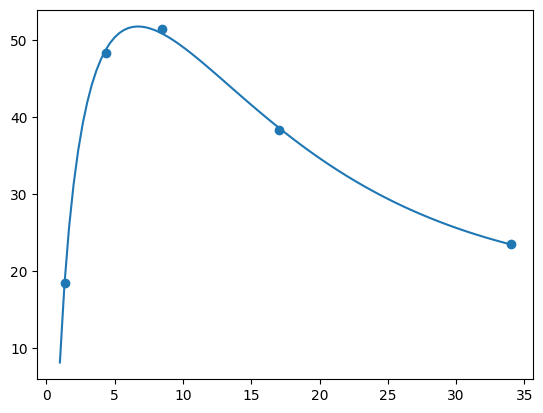

In [30]:
boyL = np.linspace(1, 34, 100)
cotL = [perL(x, *pL) for x in boyL]

plt.plot(boyL, cotL)
plt.scatter(bar['G'], bar['L'])

# Fifth parameter - M

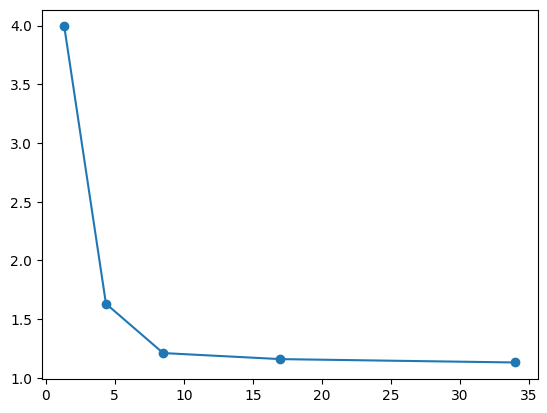

In [31]:
plt.plot(bar['G'], bar['M'])
plt.scatter(bar['G'], bar['M'])

In [32]:
def parM(x, a, b, c, d):
    return a * np.exp(-b*(x-c)) + d

In [33]:
pM, cM = curve_fit(parM, bar['G'], bar['M'],
                  bounds=(0, np.inf))
pM

array([1.77864749, 0.58670664, 2.13846046, 1.15107369])

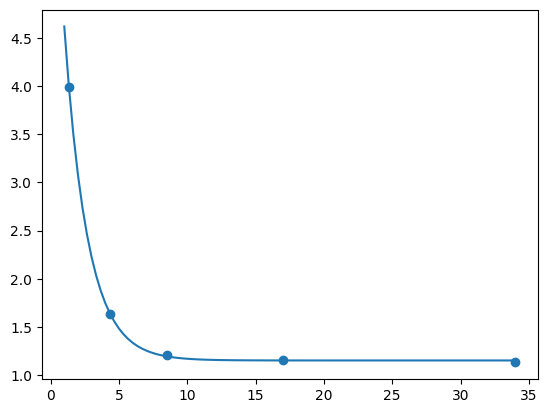

In [34]:
boyM = np.linspace(1, 34, 100)
cotM = [parM(x, *pM) for x in boyM]

plt.plot(boyM, cotM)
plt.scatter(bar['G'], bar['M'])

# Sixth parameter - N

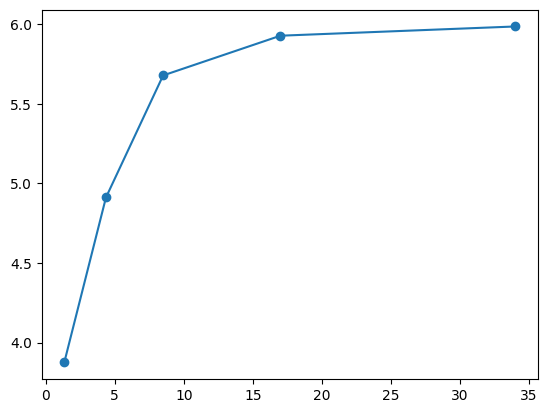

In [35]:
plt.plot(bar['G'], bar['N'])
plt.scatter(bar['G'], bar['N'])

In [36]:
def parN(x, b, c, k):
    return c * (b - np.exp(-k*x))

In [37]:
pN, cN = curve_fit(parN, bar['G'], bar['N'],
                  bounds=(0, np.inf))
pN

array([2.03552326, 2.9451789 , 0.24059714])

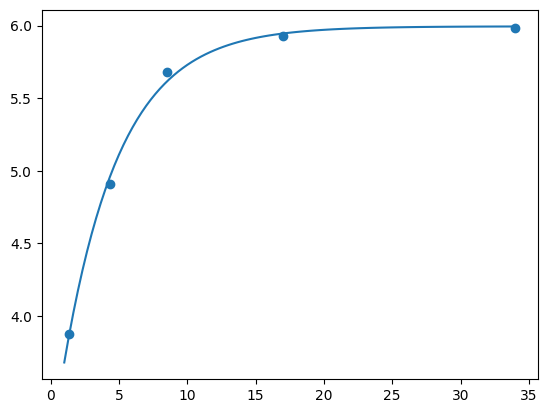

In [38]:
boyN = np.linspace(1, 34, 100)
cotN = [parN(x, *pN) for x in boyN]

plt.plot(boyN, cotN)
plt.scatter(bar['G'], bar['N'])

# Big picture

In [39]:
def test(fd, D):
    a1 = 2.53
    b1 = 0.606
    c1 = 4.27
    d1 = 0.45
    def A(D):
        return a1 * np.exp(-b1*(D-c1)) + d1
    
    a2 = 1.501
    b2 = 0.0421
    c2 = 2.444
    h2 = 0.6504
    def B(D):
        return a2 * np.exp(-b2*D) * np.log(c2*D) + h2
    
    def C(D):
        return 0.932
    
    a4 = 38.431
    b4 = 0.09157
    c4 = 0.75734
    h4 = 17.9118
    def L(D):
        return a4 * np.exp(-b4*D) * np.log(c4*D) + h4
    
    a5 = 1.78
    b5 = 0.59
    c5 = 2.14
    d5 = 1.15
    def M(D):
        return a5 * np.exp(-b5*(D-c5)) + d5
    
    b6 = 2.04
    c6 = 2.95
    k6 = 0.24
    def N(D):
        return c6 * (b6 - np.exp(-k6*D))
    
    return A(D) / (1 + np.exp(-B(D) * (fd - C(D)))) \
        + L(D) / (1 + np.exp(-M(D) * (fd - N(D))))

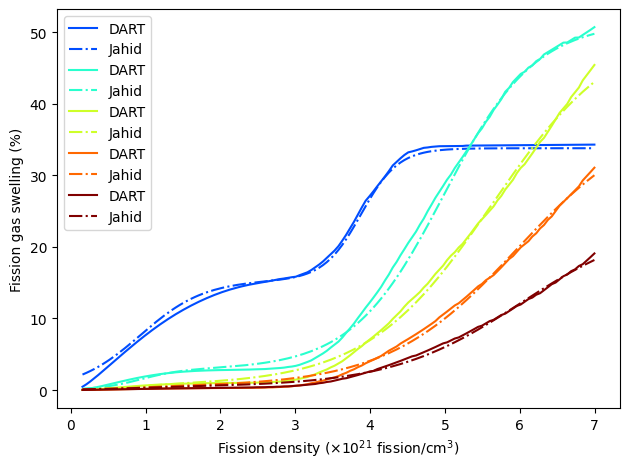

In [40]:
for G, col in zip([1.34, 4.36, 8.5, 17, 34],
                  [0.2,0.4,0.6,0.8,1.0]):
    # select grain size
    tra = jar.loc[jar[gr] == G]
    # cutoff based on local minimum
    pred = [test(x, y) for x, y in zip(tra[fd], tra[gr])]
    plt.plot(tra[fd], tra[fgs], c=plt.cm.jet(col), label='DART')
    plt.plot(tra[fd], pred, ls='-.', c=plt.cm.jet(col), label='Jahid')

plt.xlabel(r'Fission density ($\times 10^{21}$ fission/cm$^3$)')
plt.ylabel('Fission gas swelling (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Parameter reduction

In [41]:
for col in ['A', 'B', 'C', 'L', 'M', 'N']:
    print(col, bar[col].mean())

A 3.962790168
B 3.079219662
C 0.932218864
L 35.999338251999994
M 1.824556494
N 5.275719103999999


In [42]:
def pared(fd, D):
    a1 = 2.53
    b1 = 0.606
    c1 = 4.27
    d1 = 0.45
    def A(D):
        return a1 * np.exp(-b1*(D-c1)) + d1
    
    def B(D):
        return 3.08
    
    def C(D):
        return 0.932
    
    a4 = 38.431
    b4 = 0.09157
    c4 = 0.75734
    h4 = 17.9118
    def L(D):
        return a4 * np.exp(-b4*D) * np.log(c4*D) + h4
    
    a5 = 1.78
    b5 = 0.59
    c5 = 2.14
    d5 = 1.15
    def M(D):
        return a5 * np.exp(-b5*(D-c5)) + d5
    
    b6 = 2.04
    c6 = 2.95
    k6 = 0.24
    def N(D):
        return c6 * (b6 - np.exp(-k6*D))
    
    return A(D) / (1 + np.exp(-B(D) * (fd - C(D)))) \
        + L(D) / (1 + np.exp(-M(D) * (fd - N(D))))

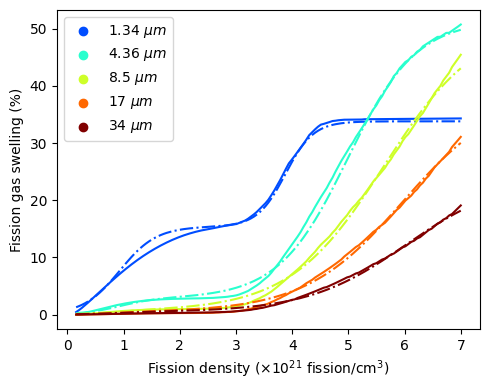

In [43]:
plt.figure(figsize=(5,4))

for G, col in zip([1.34, 4.36, 8.5, 17, 34],
                  [0.2,0.4,0.6,0.8,1.0]):
    # select grain size
    tra = jar.loc[jar[gr] == G]
    # cutoff based on local minimum
    pred = [pared(x, y) for x, y in zip(tra[fd], tra[gr])]
    plt.plot(tra[fd], tra[fgs], c=plt.cm.jet(col))
    plt.plot(tra[fd], pred, ls='-.', c=plt.cm.jet(col))
    plt.scatter([], [], color=plt.cm.jet(col), label=f'{G} $\mu m$')

plt.xlabel(r'Fission density ($\times 10^{21}$ fission/cm$^3$)')
plt.ylabel('Fission gas swelling (%)')
plt.legend()
plt.tight_layout()
plt.savefig('img_5.pdf')
plt.show()

## Comparison between 20-p and 17-p models

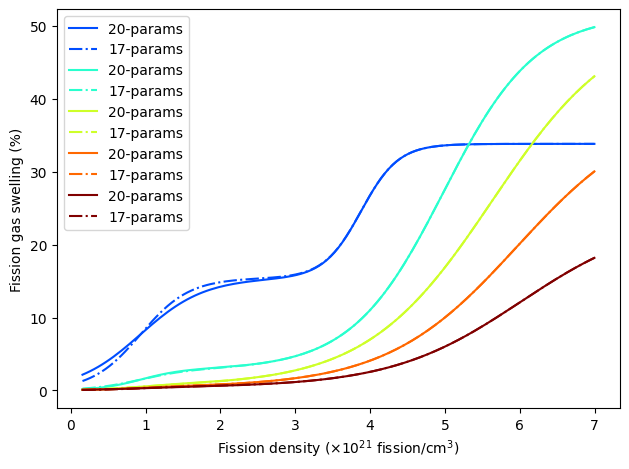

In [44]:
for G, col in zip([1.34, 4.36, 8.5, 17, 34],
                  [0.2,0.4,0.6,0.8,1.0]):
    # select grain size
    tra = jar.loc[jar[gr] == G]
    # cutoff based on local minimum
    pred1 = [test(x, y) for x, y in zip(tra[fd], tra[gr])]
    pred2 = [pared(x, y) for x, y in zip(tra[fd], tra[gr])]
    plt.plot(tra[fd], pred1, c=plt.cm.jet(col), label='20-params')
    plt.plot(tra[fd], pred2, ls='-.', c=plt.cm.jet(col), label='17-params')

plt.xlabel(r'Fission density ($\times 10^{21}$ fission/cm$^3$)')
plt.ylabel('Fission gas swelling (%)')
plt.legend()
plt.tight_layout()
plt.show()

**So, it is safe to fix B and C to their nominal values.**